![Image](./UNIMAS_logo.png)

# AKN32 Model Development
## By: Awang Khairul Nizzam Awang Azzahari
### Matrix number: 72136

#### Initialization

In [33]:
# Load libraries

# Essential for python to interact with the operating system
import os
import re

# Model development framework
import torch
import torch.nn as nn


# Image processing functions
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import Subset, random_split
from torchvision.io import read_image
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
from torchvision.datasets import ImageFolder
from tkinter import Image
from PIL import Image

# Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### VGG16 Model Definition
##### Initial Point for adjustments in the AKN32 model

In [34]:
class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


#### AKN32 Model Definition


In [35]:
class AKN32(nn.Module):
    def __init__(self, num_classes=1000):
        super(AKN32, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


#### Model Instantiation

In [36]:
vgg_model = VGG16(num_classes=1000)
akn_model = AKN32(num_classes=5)

# Set the model to evaluation mode before inferencing it

vgg_model.eval()
akn_model.eval()

AKN32(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

#### Training Dataset Batch Transform Code

In [37]:
# Training image applied transforms
transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


#### Dataset Folder Datapath Initialization

In [38]:
train_path = 'C:\\Pytorch_for_fyp\\envfyp\\Data\\resized_traintest15_train19'
train_df = pd.read_csv('C:\\Pytorch_for_fyp\\envfyp\\Data\\labels\\traintestLabels15_trainLabels19.csv')
train_df #check the labels in data

,filename,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
92358,ff8a0b45c789,4
92359,ffa47f6a7bf4,2
92360,ffc04fed30e6,0
92361,ffcf7b45f213,2


#### Custom Dataset Implementation

In [39]:
class DiaretDataset(Dataset):
    def __init__(self, data_dir, labels_df, transform=None):
        self.data_dir = data_dir
        self.labels_df = labels_df
        self.transform = transform

    def __getitem__(self, idx):
        # Get the image file name from the labels dataframe
        image_name = self.labels_df.iloc[idx]['filename']
        image_name += ".jpg"  # Append the file extension ".jpg" to the image_name
        image_path = os.path.join(self.data_dir, image_name)
        image = Image.open(image_path).convert("RGB")  # Open and convert to RGB format

        # Apply the desired transformations if needed
        if self.transform is not None:
            image = self.transform(image)

        label = self.labels_df.iloc[idx]['level']  # Get the label for the corresponding image

        return image, label

    def __len__(self):
        return len(self.labels_df)

#### Dataset Instantiation

In [40]:
full_dataset = DiaretDataset(train_path, train_df)

#### Dataloading Process

In [41]:
train_dataset = DiaretDataset(train_path, train_df, transformer)
val_dataset = DiaretDataset(train_path, train_df, transformer)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

#### Image Display

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


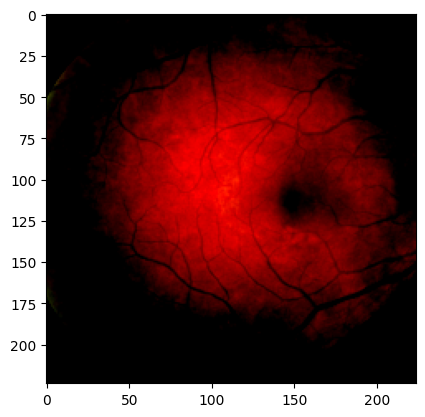

Label: tensor([0])


In [42]:
# training dataset image display
train_features, train_labels = next(iter(train_dataloader))

# random index
random_index = torch.randint(0, len(train_features), (1,))

# display
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[random_index].squeeze().permute(1, 2, 0)  # Permute dimensions for displaying with matplotlib
label = train_labels[random_index]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


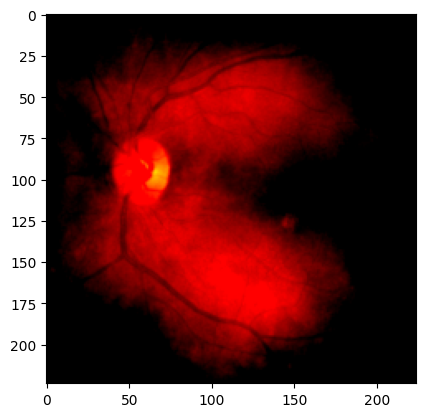

Label: tensor([0])


In [43]:
# validation dataset image display
val_features, val_labels = next(iter(val_dataloader))

#random index
random_index = torch.randint(0, len(val_features), (1,))

#display
print(f"Feature batch shape: {val_features.size()}")
print(f"Labels batch shape: {val_labels.size()}")
img = val_features[random_index].squeeze().permute(1, 2, 0)  # Permute dimensions for displaying with matplotlib
label = val_labels[random_index]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

#### Dataset classes and tally

0    67148
2    14151
1     6575
3     2280
4     2209
Name: level, dtype: int64

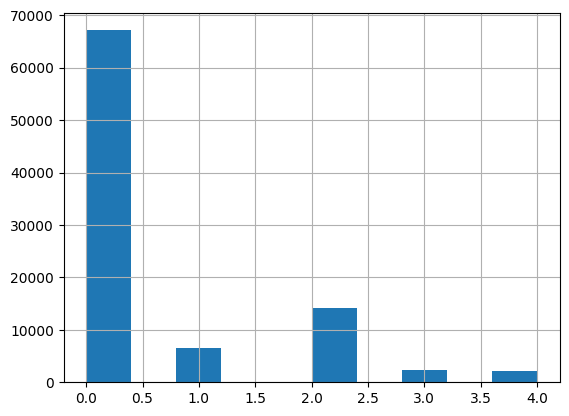

In [44]:
train_df['level'].hist()
train_df['level'].value_counts()

#### Dataset Split for training and testing

In [45]:
# Set the seed for reproducibility
torch.manual_seed(8816001000)

# Define the sizes for training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Split the dataset into training and validation subsets
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Print the sizes of the resulting subsets
print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))

Training dataset size: 73890
Validation dataset size: 18473


#### Model inferencing

In [46]:
#Accessing the images in the validation split of the full dataset for testing reasons
image, label = val_dataset[random_index]

#preprocess the image
preprocessed_image = transformer(image).unsqueeze(0)

#declare outputs for both models

outputs_vgg = vgg_model(preprocessed_image)
outputs_akn = akn_model(preprocessed_image)

In [47]:
#VGG16 Model outputs

softmax = nn.Softmax(dim=1)
probabilities = softmax(outputs_vgg)
_, predicted_idx = torch.max(probabilities, 1)
predicted_label = predicted_idx.item()
print(predicted_label)

976


Note: on the webpage https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/ , the label 976 indicates the image contains ![promontory, headland, head, foreland](./ILSVRC2012_val_00031493..JPEG), labelled as promontory, headland, head, foreland, which means the model requires further training as this label is simply an arbitrary index that the model calculated to be the closest

In [48]:
#AKN32 Model outputs

softmax = nn.Softmax(dim=1)
probabilities = softmax(outputs_akn)
_, predicted_idx = torch.max(probabilities, 1)
predicted_label = predicted_idx.item()
print(predicted_label)

2


Note: the output of the akn model without training is correct but this may be a coincidence